# Cyfrowe przetwarzanie sygnałów i obrazów
### Przetwarzanie syngałów

||Imię i nazwisko|Numer albumu|
|---|----------- | ----------- |
|1.|Kamil Hulewicz|248889|
|2.|Konrad Abramowski|248849|
Prowadzący: |**Dr. inż. Jacek Cichosz**|

# Ćwiczenie 1.


[]

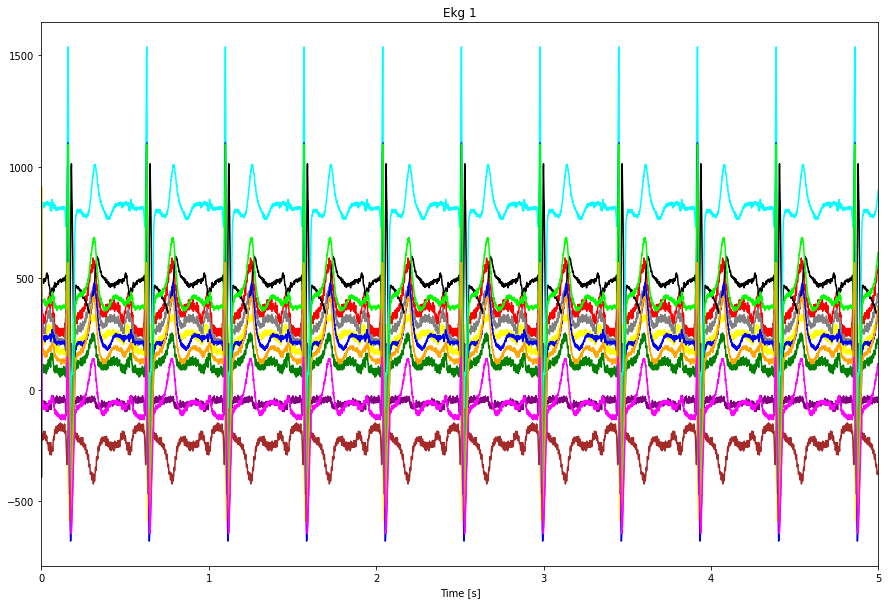

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal

ekg1 = pd.read_csv('ekg1.txt', names=['Column0','Column1','Column2','Column3','Column4','Column5','Column6','Column7','Column8','Column9','Column10','Column11'], sep=' ')
sampling_frequency = 1000
#print(ekg1.shape[0])
ekg1_time = ((ekg1.shape[0])/sampling_frequency)
ekg1['T_series'] = ekg1.index/sampling_frequency
ekg1 = ekg1.set_index('T_series')
#################################################################

fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,10))
axes.plot(ekg1.index, ekg1['Column0'], color='green')
axes.plot(ekg1.index, ekg1['Column1'], color='red')
axes.plot(ekg1.index, ekg1['Column2'], color='yellow')
axes.plot(ekg1.index, ekg1['Column3'], color='brown')
axes.plot(ekg1.index, ekg1['Column4'], color='purple')
axes.plot(ekg1.index, ekg1['Column5'], color='gray')
axes.plot(ekg1.index, ekg1['Column6'], color='black')
axes.plot(ekg1.index, ekg1['Column7'], color='cyan')
axes.plot(ekg1.index, ekg1['Column8'], color='blue')
axes.plot(ekg1.index, ekg1['Column9'], color='lime')
axes.plot(ekg1.index, ekg1['Column10'], color='orange')
axes.plot(ekg1.index, ekg1['Column11'], color='magenta')
axes.set_title("Ekg 1")
axes.set_xlabel("Time [s]")
plt.xlim(0,ekg1.shape[0]/sampling_frequency)
name = input("Enter name: ")
plt.savefig(name + "ekg1.jpg")
plt.plot()

Pass plot range (max value: 5.0):


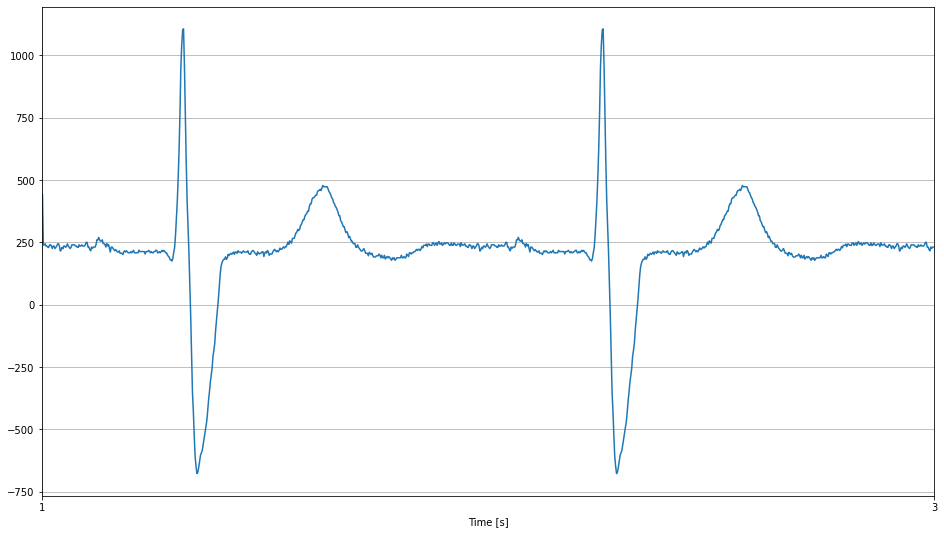

In [276]:
print("Pass plot range (max value: " + str(ekg1_time) + "):")
lower_limit = input("Lower limit: ")
upper_limit = input("Upper limit: ")
if lower_limit >= upper_limit:
    print("Lower limit can`t be equal or greater than upper limit!")  
else:
    plt.figure(figsize=(16,9))
    plt.plot(ekg1.index, ekg1['Column8'])
    plt.xlim(lower_limit, upper_limit)
    plt.grid()
    plt.xlabel('Time [s]')
    plt.savefig('plot.png')
    plt.show()

[]

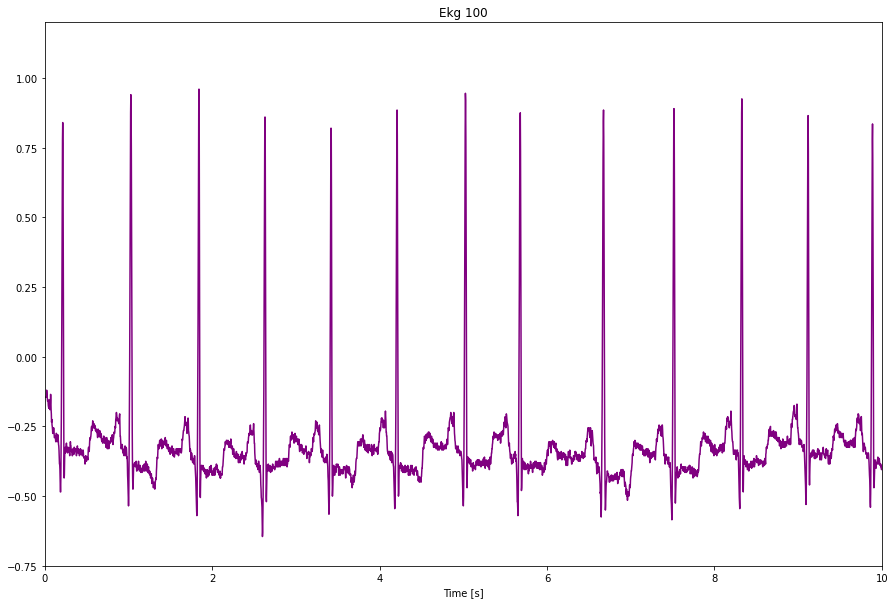

In [65]:
ekg100 = pd.read_csv('ekg100.txt', names=['Column0'])
sampling_frequency_100 = 360 

ekg100['T_series'] = ekg100.index/sampling_frequency_100
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,10))
axes.plot(ekg100["T_series"], ekg100["Column0"], color='purple')
axes.set_title("Ekg 100")
axes.set_xlabel("Time [s]")
plt.xlim(0, 10)
plt.ylim(-0.75,1.2)
# #name = input("Enter name: ")
# #plt.savefig(name + ".jpg")
plt.plot()

<ipython-input-66-3a623d50747f>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  noise = pd.read_csv('ekg_noise.txt', names=["T_series",'val'], sep="  ")


[]

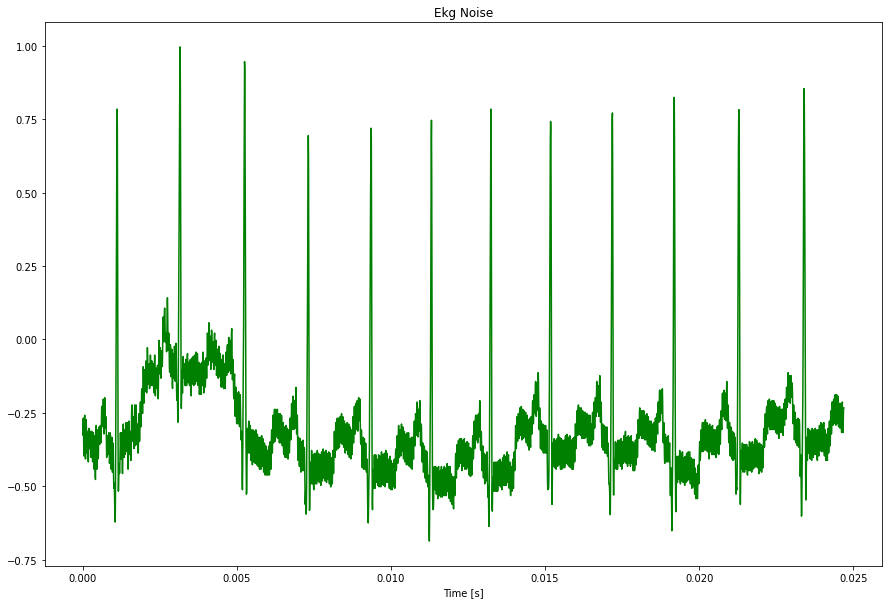

In [66]:
noise = pd.read_csv('ekg_noise.txt', names=["T_series",'val'], sep="  ")
sampling_frequency_noise = 360 

noise['T_series'] = noise['T_series']/sampling_frequency_noise
noise.head()
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,10))
axes.plot(noise['T_series'], noise['val'], color='green')
axes.set_title("Ekg Noise")
axes.set_xlabel("Time [s]")
# plt.xlim(0, 10)
# plt.ylim(-0.75,1.2)
# # #name = input("Enter name: ")
# # #plt.savefig(name + ".jpg")
plt.plot()

# Ćwiczenie 2.

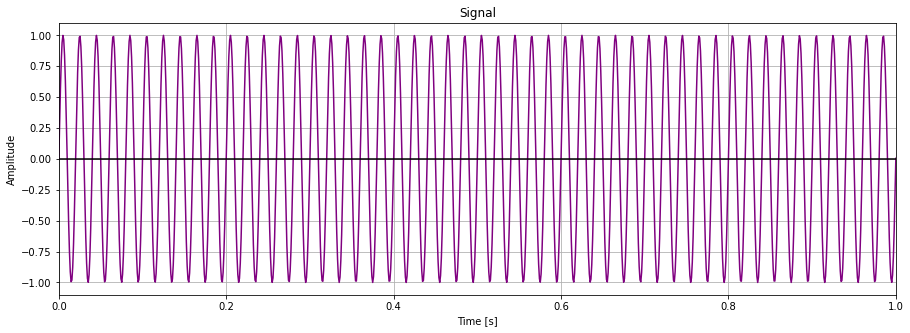

In [50]:
#sin(2*pi*f*t)
sinus_signal = lambda f,fs,N: np.sin(2*np.pi*f*np.linspace(0,N/fs,N))

samples = 65536

signal_frequency = 50
sampling_frequency = 1024
linspaces = lambda a,b,c: np.linspace(a,c/b,c)
n = linspaces(0, sampling_frequency, samples)
val = sinus_signal(signal_frequency,sampling_frequency,samples)

fig, ax = plt.subplots(ncols=1, nrows = 1, figsize=(15,5))
ax.plot(n, val, color='purple')
ax.set_title("Signal")
ax.set_ylabel("Amplitude")
ax.set_xlabel("Time [s]")
ax.axhline(y=0, color='k')
ax.grid(True)
plt.xlim(0,1)
plt.show()

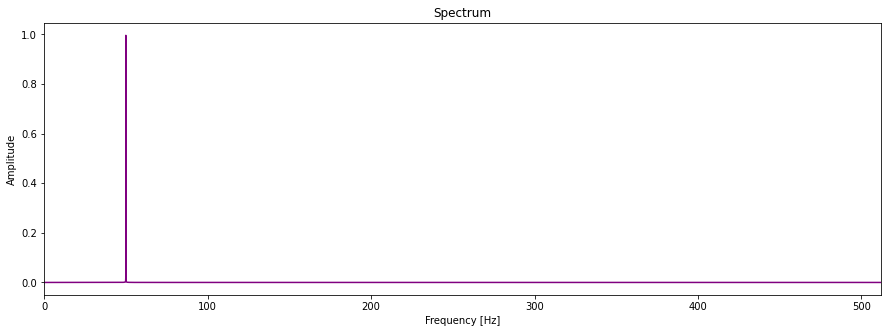

In [223]:
def amplitude_spec(s, fs, N):
    sig = abs(np.fft.fft(s))
    sig = sig / (N/2)
    freq = np.linspace(0,fs/2,N//2)
    fig, ax = plt.subplots(ncols=1, nrows = 1, figsize=(15,5))
    ax.plot(freq, sig[:N//2], color='purple')
    ax.set_title("Spectrum")
    ax.set_ylabel("Amplitude")
    ax.set_xlabel("Frequency [Hz]")
    plt.xlim(0,fs/2)

    plt.show()

amplitude_spec(val, sampling_frequency, samples)

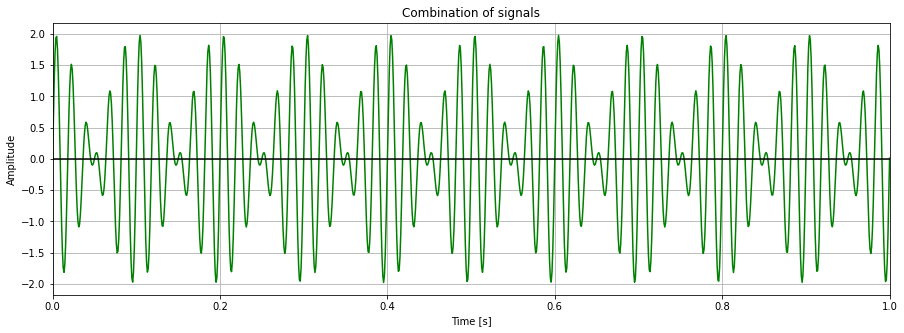

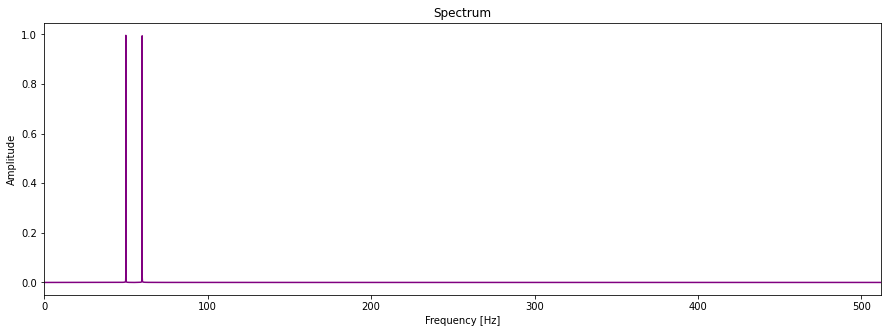

In [237]:
# frequency_one = 50
# frequency_two = 60

# tmp_sin = lambda x: np.sin(2*np.pi*n_bins*x/sampling_frequency)
# combined_spectra = (lambda x,y: np.fft.rfft((tmp_sin(x)+tmp_sin(y))))(frequency_one,frequency_two)
# combined_signal = tmp_sin(frequency_one) + tmp_sin(frequency_two)
f1 = 50
f2 = 60
s1 = sinus_signal(f1 ,sampling_frequency, samples)
s2 = sinus_signal(f2 ,sampling_frequency, samples)
X = linspaces(0, sampling_frequency, samples)

fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,5))
#axes.plot(X, val, color='purple')
#axes.plot(X, s2, color='red')
axes.plot(X, s1+s2, color='green')
plt.xlim(0,1)
axes.set_title("Combination of signals")
axes.set_ylabel("Amplitude")
axes.set_xlabel("Time [s]")
axes.grid(True)
axes.axhline(y=0, color='k')

plt.show()

# fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,5))
# #axes.plot(X, val, color='purple')
# #axes.plot(X, s2, color='red')
# axes.plot(X, s1+s2, color='green')
# plt.xlim(0,1)
# axes.set_title("Combination of signals")
# axes.set_ylabel("Amplitude")
# axes.set_xlabel("Time [s]")
# axes.grid(True)
# axes.axhline(y=0, color='k')

amplitude_spec(s1+s2, sampling_frequency, samples)

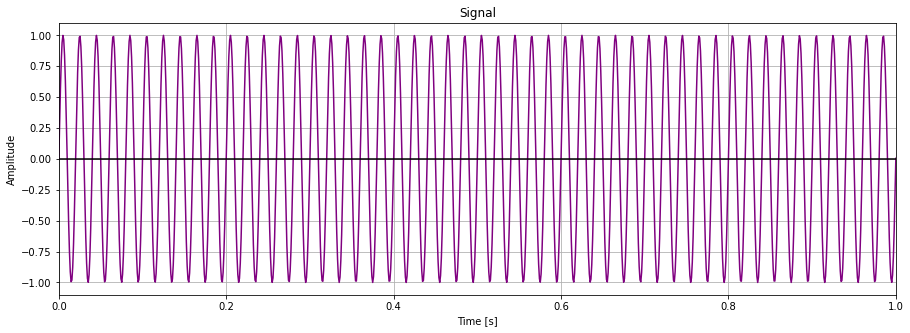

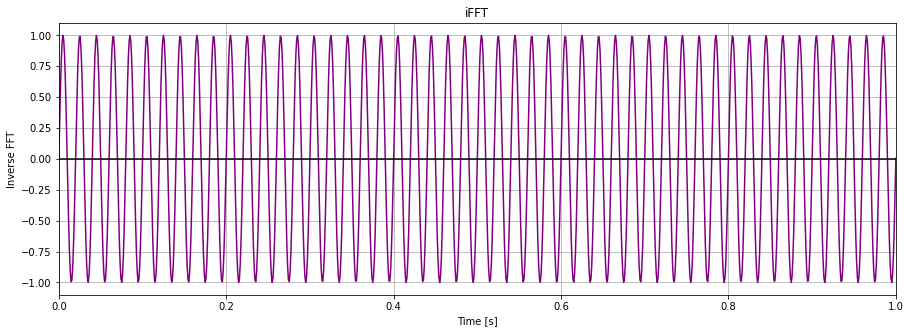

1.0


In [63]:
fig, ax = plt.subplots(ncols=1, nrows = 1, figsize=(15,5))
ax.plot(n, val, color='purple')
ax.set_title("Signal")
ax.set_ylabel("Amplitude")
ax.set_xlabel("Time [s]")
ax.axhline(y=0, color='k')
ax.grid(True)
plt.xlim(0,1)
plt.show()

val_fft = np.fft.fft(val)
val_ifft = np.fft.ifft(val_fft).real

fig, ax = plt.subplots(ncols=1, nrows = 1, figsize=(15,5))
ax.plot(n, val_ifft, color='purple')
ax.set_title("iFFT")
ax.set_ylabel("Inverse FFT")
ax.set_xlabel("Time [s]")
ax.axhline(y=0, color='k')
ax.grid(True)
plt.xlim(0,1)
plt.show()

print(np.sum(np.cos(val-val_ifft))/len(val))


# Ćwiczenie 3

[]

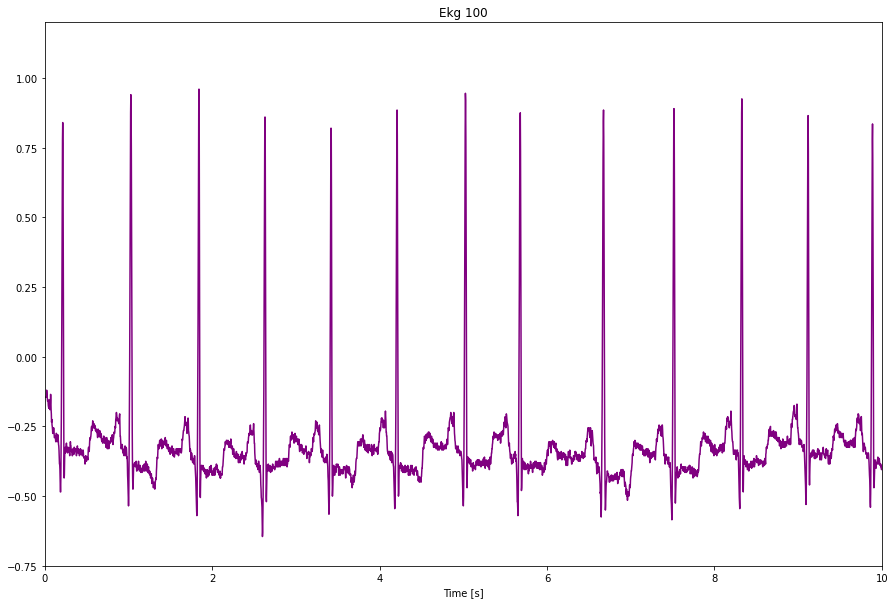

In [68]:
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,10))
axes.plot(ekg100["T_series"], ekg100["Column0"], color='purple')
axes.set_title("Ekg 100")
axes.set_xlabel("Time [s]")
plt.xlim(0, 10)
plt.ylim(-0.75,1.2)
plt.plot()

# Ćwiczenie 4

In [162]:
ekg_noise = pd.read_csv("ekg_noise.txt", names = ("time", "Magnitude"), sep='\s+')
ekg_noise.head()

ekg_noise[]

,time,Magnitude
0,0.000000,-0.325000
1,0.002778,-0.273038
2,0.005556,-0.268038
3,0.008333,-0.320000
4,0.011111,-0.391962
